# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [129]:
#kmr weatherpy workbook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [130]:
# Test to determine if the API key and url are working before gettign too far down the road
# ... for some reason this will not run when I am outside the Python 3 kernel

# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Burundi"

# Get weather data
xquery_url = url + "appid=" + api_key + "&q=" + town

# Get temperature from JSON response
weather_response = requests.get(xquery_url).json()
weather_json = weather_response['main']['temp']

# Report temperature
print(f"The weather API responded with: {weather_json}.")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Function to make the json format accessible for script writing
#print(json.dumps(weather_response, indent=4, sort_keys=True))

The weather API responded with: 289.56.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": -3.5,
        "lon": 30
    },
    "dt": 1603149110,
    "id": 433561,
    "main": {
        "feels_like": 289.71,
        "grnd_level": 828,
        "humidity": 81,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 289.56,
        "temp_max": 289.56,
        "temp_min": 289.56
    },
    "name": "Burundi",
    "sys": {
        "country": "BI",
        "sunrise": 1603165116,
        "sunset": 1603209033
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 279,
        "speed": 1.18
    }
}


## Generate Cities List

In [131]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
fullset = len(cities)
print("The number of randomly generated cities in the project scope")
print(fullset)

The number of randomly generated cities in the project scope
631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [132]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create lists to capture date for use in data frame
#cities = ["London", "Burundi", "xxToronto"]
cities = cities
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
counter = 0

# Loop through the list of cities and perform a request for data on each
print("Exhibit 1: Confirmation listing of cities included or dropped from the project scope")
for city in cities:
    response = requests.get(query_url + city).json()
    print(f"Processing Record {counter} of {fullset}. City = {city}")
    counter = counter + 1
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        print("... dropping  " + city + "  because it was not found on the Open Weather site")
        cities.remove(city)
        pass


Exhibit 1: Confirmation listing of cities included or dropped from the project scope
Processing Record 0 of 631. City = London
Processing Record 1 of 631. City = Burundi
Processing Record 2 of 631. City = xxToronto
... dropping  xxToronto  because it was not found on the Open Weather site


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
# Create a data frame from the response lists

dictionary = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Temp Max": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
dictionary = pd.DataFrame(dictionary)
print("Exhibit 2: Table with in scope cities and their weather data")
dictionary.head()

Exhibit 2: Table with in scope cities and their weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.51,-0.13,13.00,66,100,4.60,GB,1603148662
1,Burundi,-3.50,30.00,16.41,81,91,1.18,BI,1603149116


In [134]:
# Export the data frame to a csv file
dictionary.to_csv("output_data/exhibittwo_citiesmatchedtoopenweather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [135]:
# Inspect and remove cities with humidity greater than 100%
dehumidified = dictionary.loc[dictionary["Humidity"] <= 100]
print("Exhibit 3: Table with in scope cities and their weather data. Note: humidity confimred at <= 100%")
dehumidify.head()

Exhibit 3: Table with in scope cities and their weather data. Note: humidity confimred at <= 100%


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.51,-0.13,13.00,62,Clouds,4.6,GB,1603144831
1,Burundi,-3.50,30.00,17.17,78,Clouds,1.1,BI,1603145513


In [136]:
print("Exhibit 4: List of cities removed from project because humidity was greater than 100% ... blank if none")
humidoutliers = dictionary.loc[dictionary["Humidity"] > 100]
humidoutliers.head()

Exhibit 4: List of cities removed from project because humidity was greater than 100% ... blank if none


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [139]:
# Export the data frame to a csv file
dehumidified.to_csv("output_data/exhibitthree_cleancitydata.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

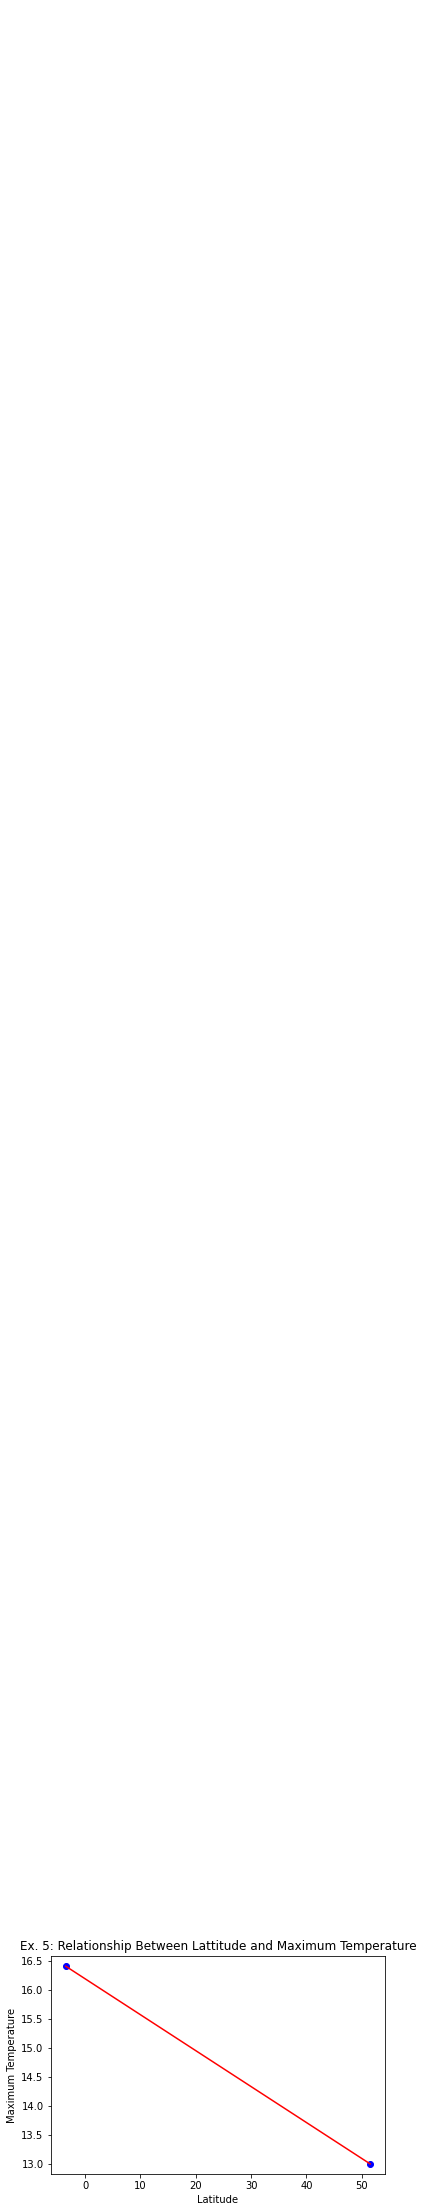

The correlation coefficient is -1.0
The line equation is as follows:  y = -0.06x + 16.19


In [140]:
# Compare latitude to temperature

x_axis = dehumidified["Lat"]
y_axis = dehumidified["Temp Max"]
   
plt.title("Ex. 5: Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/exhibitfive_lat2temp.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Humidity Plot

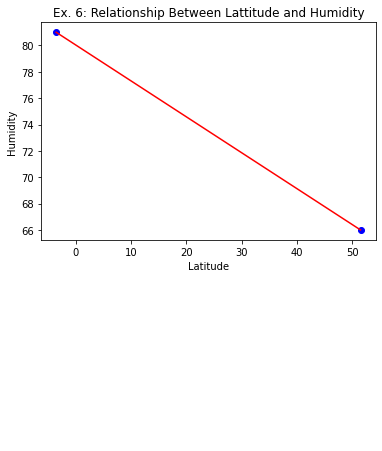

The correlation coefficient is -1.0
The line equation is as follows:  y = -0.27x + 80.05


In [141]:
# Compare latitude to humidity
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Humidity"]
   
plt.title("Ex. 6: Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/exhibitsix_lat2humidity.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Cloudiness Plot

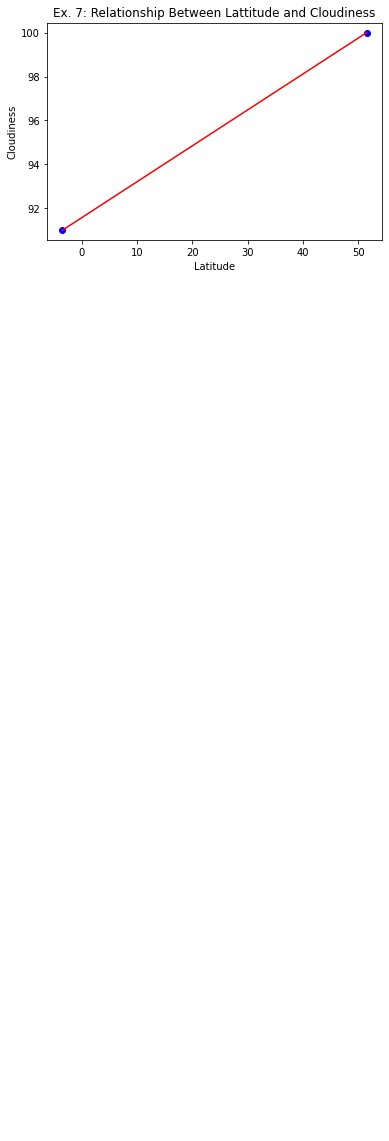

The correlation coefficient is 1.0
The line equation is as follows:  y = 0.16x + 91.57


In [142]:
# Compare latitude to cloudiness
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Cloudiness"]
   
plt.title("Ex. 7: Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/exhibitseven_lat2cloudiness.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

## Latitude vs. Wind Speed Plot

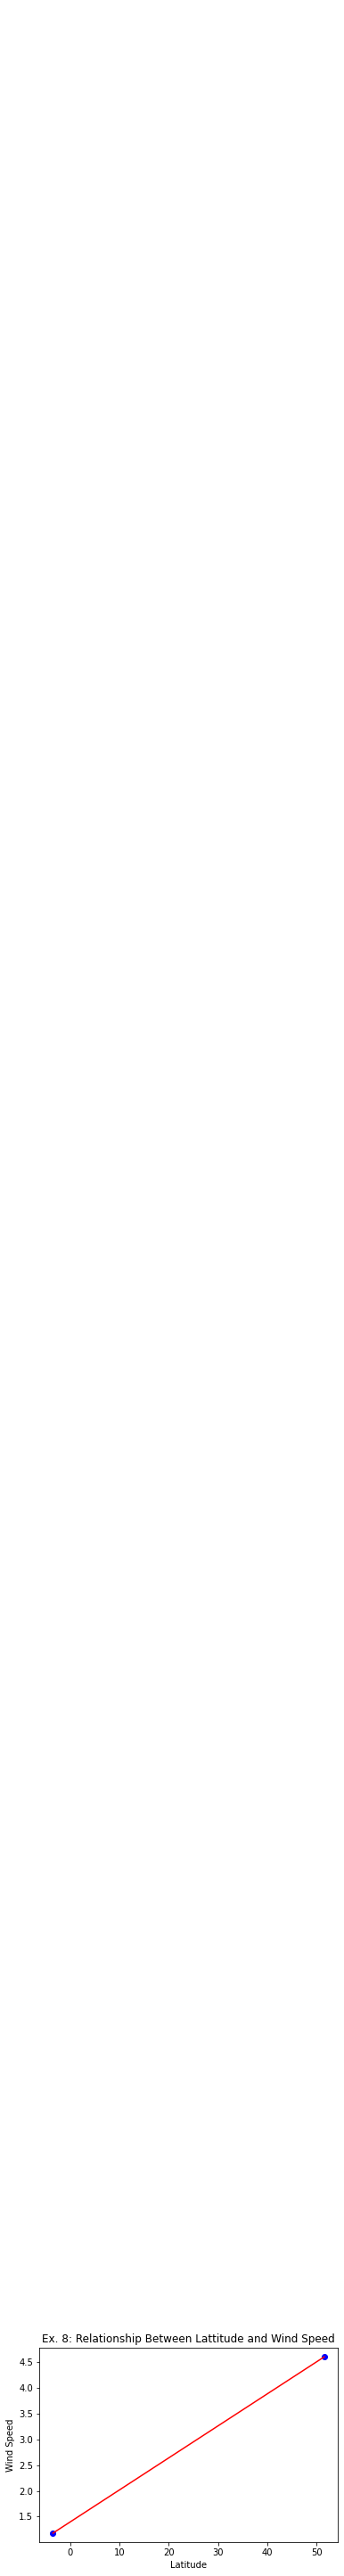

The correlation coefficient is 1.0
The line equation is as follows:  y = 0.06x + 1.4


In [143]:
# Compare latitude to wind speed
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Wind Speed"]
   
plt.title("Ex. 8: Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_axis, y_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/exhibiteight_lat2windspeed.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

## Linear Regression

In [24]:
# See above

In [145]:
# Build a northern hemisphere data frame
northern = dehumidified.loc[dehumidified["Lat"] >= 0]
print("Exhibit 9: Table of cities at or north of equator. Note: humidity confimred at <= 100%")
northern.head()

Exhibit 9: Table of cities at or north of equator. Note: humidity confimred at <= 100%


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.51,-0.13,13.0,66,100,4.6,GB,1603148662


In [146]:
# Build a southern hemisphere data frame
southern = dehumidified.loc[dehumidified["Lat"] < 0]
print("Exhibit 10: Table of cities south of equator. Note: humidity confimred at <= 100%")
southern.head()

Exhibit 10: Table of cities south of equator. Note: humidity confimred at <= 100%


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
1,Burundi,-3.5,30.0,16.41,81,91,1.18,BI,1603149116


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [149]:
# # Compare latitude to temperature

# x_axis = northern["Lat"]
# y_axis = northern["Temp Max"]
   
# plt.title("Ex. 11: Northern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
# plt.xlabel("Latitude")
# plt.ylabel("Maximum Temperature")

# plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.savefig("output_data/exhibiteleven_lat2temp.png")
# plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


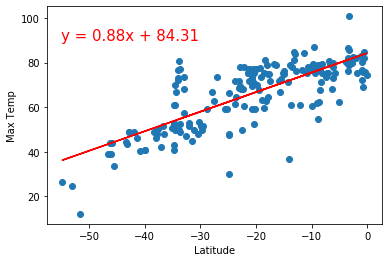

In [26]:
# # Compare latitude to temperature

# x_axis = southern["Lat"]
# y_axis = southern["Temp Max"]
   
# plt.title("Ex. 12: Southern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
# plt.xlabel("Latitude")
# plt.ylabel("Maximum Temperature")

# plt.scatter(x_axis, y_axis, marker="o", color="blue")

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.savefig("output_data/exhibittwelve_lat2temp.png")
# plt.show()
# print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# print(f"The line equation is as follows:  {line_eq}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


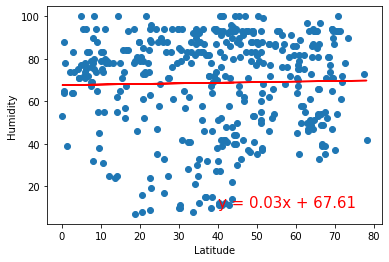

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


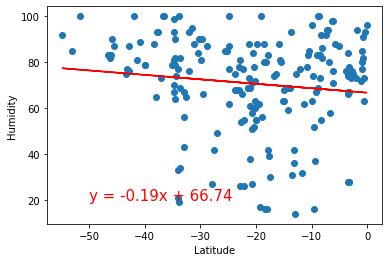

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


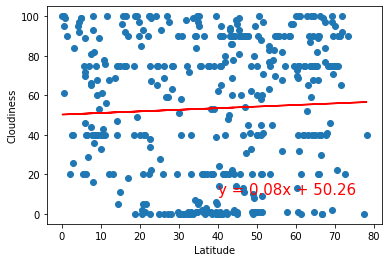

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


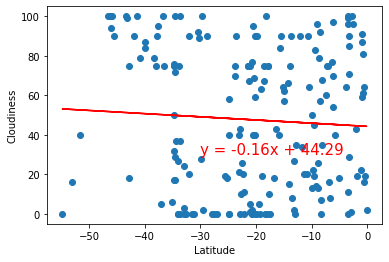

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


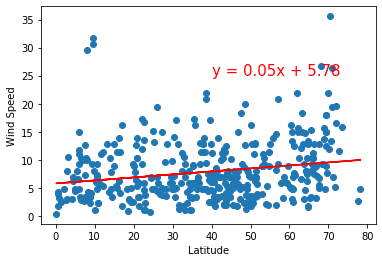

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


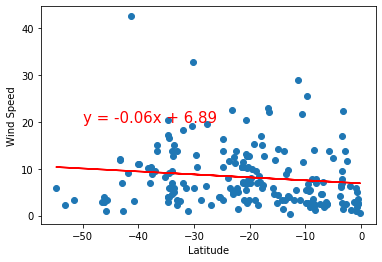